# TP1 - Ondelettes 1D

In [1]:
from ipywidgets import interact,widgets
import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt
import pywt
import scipy.io as sio
import pandas as pd
SS= sio.loadmat('Piece2.mat')
SS2= sio.loadmat('Blocks.mat')
S2=SS['S']
S3=S2[0]

# En attendant de mettre au propre
import warnings
warnings.filterwarnings('ignore')

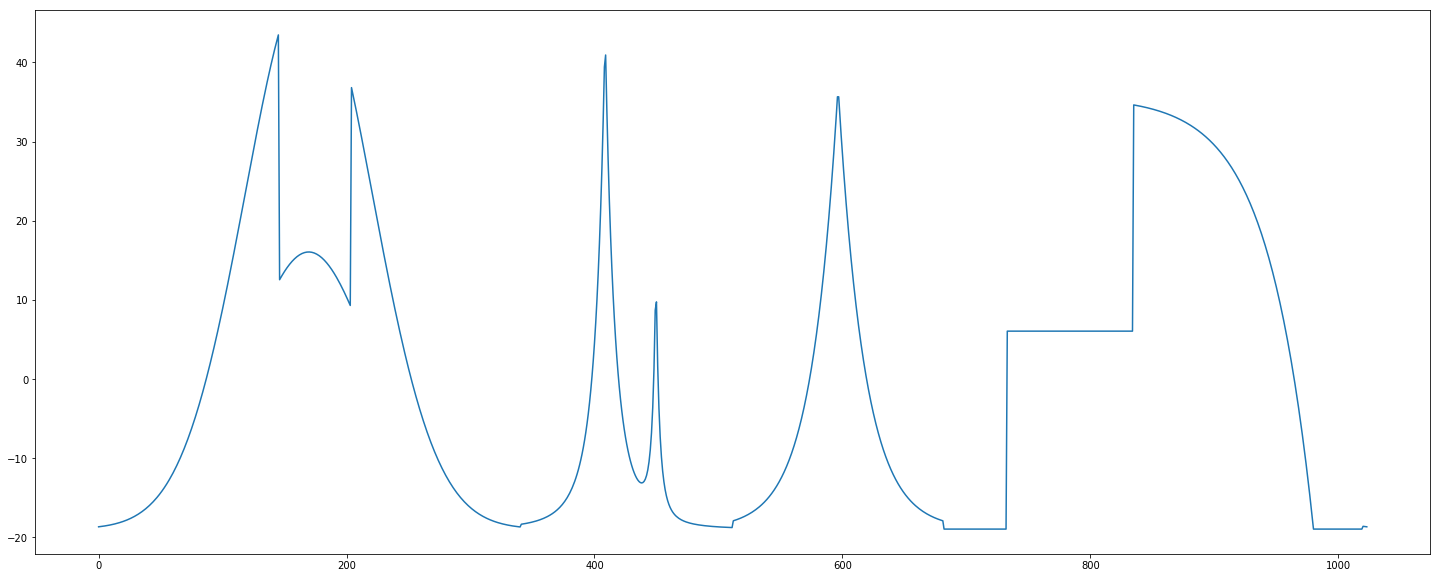

In [2]:
plt.figure(figsize=(25,10))
plt.plot(S3)
plt.show()

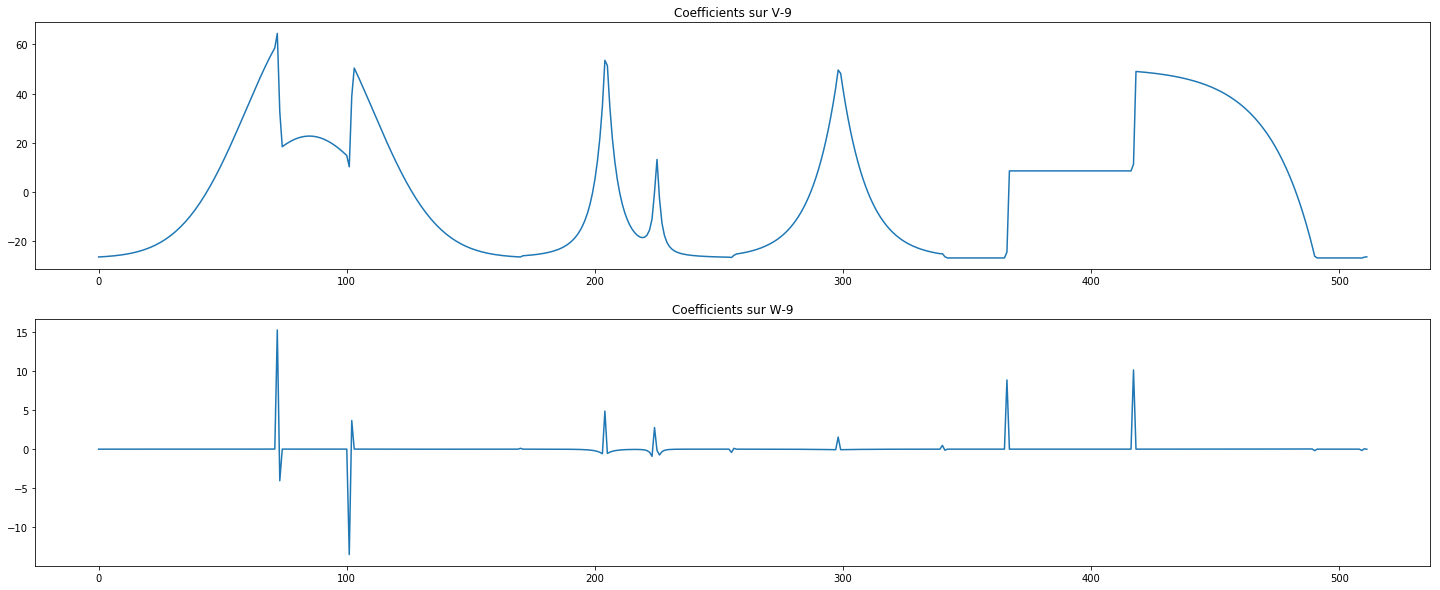

In [3]:
# mode per = périodique, permet de gérer les effets de bord, option à garder
pywt.waverec?
x= pywt.wavedec(S3, 'db2', mode='per', level=1)
plt.figure(figsize=(25,10))
plt.subplot(2, 1, 1)
plt.plot(x[0])
plt.title('Coefficients sur V-9')
plt.subplot(2, 1, 2)
plt.plot(x[1])
plt.title('Coefficients sur W-9')
plt.show()

In [68]:
def VisuFoncEchel(N, qmf, scale, pos, mode='per'):
    Lmax = pywt.dwt_max_level(N,pywt.Wavelet(qmf).dec_len)
    L = min(scale,Lmax)
    Ne = int(np.floor(N/2**L)) # Taille du plus petit vecteur
    k = int(np.floor(Ne*pos))
    temp = np.zeros(N)
    WT = pywt.wavedecn(temp, qmf, mode=mode, level=L)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    temp[k] = 1
    print(len(WT[0]))
    #print(WT)
    coeffs_from_arr = pywt.array_to_coeffs(temp, coeff_slices)
    Phi = pywt.waverecn(coeffs_from_arr, qmf, mode=mode)
    return Phi
def VisuOnd(N, qmf, scale, pos) :
    """Affiche une ondelette sans connaître sa formule.
    Idée : la transfo en ondelette de l'ondelette elle-même donne un vecteur de 0 avec un seul 1. Donc la transfo
    inverse d'un vecteur de 0 avec un seul 1, ie un Dirac, donne l'ondelette
    Marche car toutes les ondelettes sont orthogonales entre elles à l'intérieur d'un même espace, et les espaces
    sont orthogonaux entre eux.
    """
    Lmax = pywt.dwt_max_level(N, pywt.Wavelet(qmf).dec_len)
    L = min(scale, Lmax)
    Ne = int(np.floor(N / 2**L))
    k = int(np.floor(Ne*pos))
    temp = np.zeros(N)
    WT = pywt.wavedecn(temp, qmf, mode='per', level=L)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    temp[k + Ne] = 1
    coeffs_from_arr = pywt.array_to_coeffs(temp, coeff_slices)
    Psi = pywt.waverecn(coeffs_from_arr, qmf, mode='per')
    return Psi
def ApproxLin(S,qmf,scale):
    # Approximation linéaire dans une base d'ondelettes. l'ondelette est spécifiée par la str qmf 
    # L'approximation est une projection sur l'espace V_j de dimension 2^scale. 
    N1=len(S)
    Lmax=pywt.dwt_max_level(len(S),pywt.Wavelet(qmf).dec_len)
    WT= pywt.wavedecn(S, qmf, mode='per', level=Lmax)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    temp=np.zeros(N1)
    temp[0:2**scale]=arr[0:2**scale]
    Wtemp = pywt.array_to_coeffs(temp, coeff_slices)
    Srec=pywt.waverecn(Wtemp,qmf,mode='per')
    return Srec
def ApproxOnd1D(S,qmf,L,T):
    Lmax = pywt.dwt_max_level(len(S),pywt.Wavelet(qmf).dec_len)
    L1 = min(L, Lmax)
    WT = pywt.wavedecn(S, qmf, mode='per', level=L1)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    WTS = arr * (np.abs(arr) > T)
    coeffs_from_arr = pywt.array_to_coeffs(WTS, coeff_slices)
    Srec = pywt.waverecn(coeffs_from_arr,qmf,mode='per')
    return Srec
def ApproxOnd1Dv2(S,qmf,L,N):
    N1 = len(S)
    Lmax = pywt.dwt_max_level(len(S),pywt.Wavelet(qmf).dec_len)
    L1 = min(L, Lmax)
    WT = pywt.wavedecn(S, qmf, mode='per', level=L1)
    arr, coeff_slices = pywt.coeffs_to_array(WT)
    Ind = np.argsort(np.abs(arr))
    WTS = np.zeros(N1)
    WTS[Ind[N1 - N : N1]] = arr[Ind[N1 - N : N1]]
    coeffs_from_arr = pywt.array_to_coeffs(WTS, coeff_slices)
    Srec = pywt.waverecn(coeffs_from_arr, qmf, mode='per')
    return Srec
#pywt.wavedecn?

La commande `Lmax` au début de chaque fonction permet de trouver le nombre maximal de décomposition possible (dépend de la taille du signal et de la taille du filtre).

La différence entre `ApproxOnd1D` et `ApproxOnd1Dv2` est que dans le premier cas on remplit tous les indices du tableau `WTS` alors que dans le deuxième cas on crée un tableau de $0$, qu'on ne remplit qu'avec les termes non nuls. Dans la deuxième fonction on trie les coefficients en valeur absolue puis on garde les N derniers. Dans la première fonction on garde tous ceux supérieurs à un certain seuil T.

A ajouter :

liste = Listbox(fenetre)
liste.insert(1, "Python")
liste.insert(2, "PHP")
liste.insert(3, "jQuery")
liste.insert(4, "CSS")
liste.insert(5, "Javascript")
liste.pack()

In [10]:
wavelist = ['haar','db2','db3','db4','coif1','coif2','coif3','sym2','sym3']

In [9]:
i = 6
@interact(lev=widgets.IntSlider(min=3,max=10,step=1,value=6,continuous_update=False))

def Aff_decompo_haar(lev) :
    Srec=ApproxLin(S3, wavelist[i], lev)
    plt.figure(figsize=(25,10))
    plt.plot(Srec,'r')
    plt.plot(S3)
    plt.title("Décomposition avec ondelette " + wavelist[i] + " et niveau " + str(lev), size=30)
    plt.show()

interactive(children=(IntSlider(value=6, continuous_update=False, description='lev', max=10, min=3), Output())…

db2 approxime très bien les parties régulières mais oscille aux non-régularités
idem pour db3, db4 lisse un peu plus --> plus le nombre de moments nuls est grand, plus la décompo lisse la fonction initiale
coif1 est pareille que db2 : résultats plutôt bons sur les parties régulières et oscille sur les non-régularités
coif2 lisse un peu plus ; coif3 encore plus

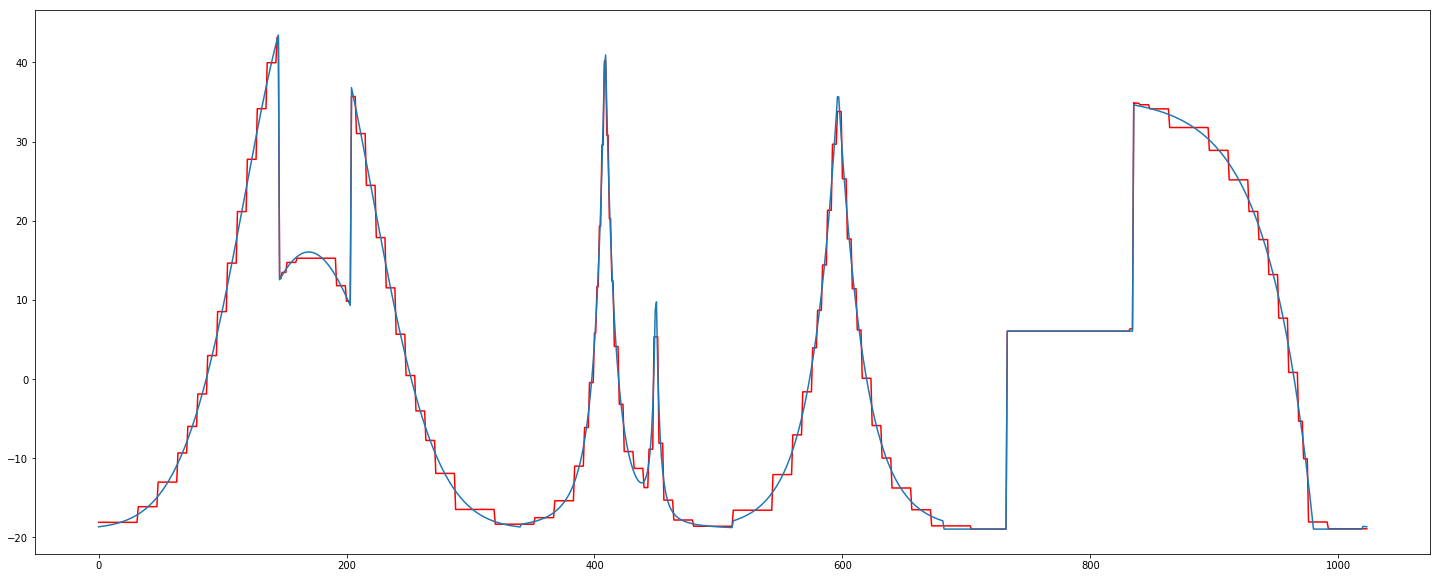

In [70]:
Srec=ApproxOnd1Dv2(S3,'haar',9,100)
plt.figure(figsize=(25,10))
plt.plot(Srec,'r')
plt.plot(S3)
plt.show()

Puisque les deux fonctions ApproxOnd1D version 1 et 2 n'ont pas les mêmes arguments (T et N), il faut modifier dans Srec ci-dessus selon laquelle on utilise. Ici avec le signal fourni, N=100 pour la v2 est équivalent à T=10 pour la v1.

1


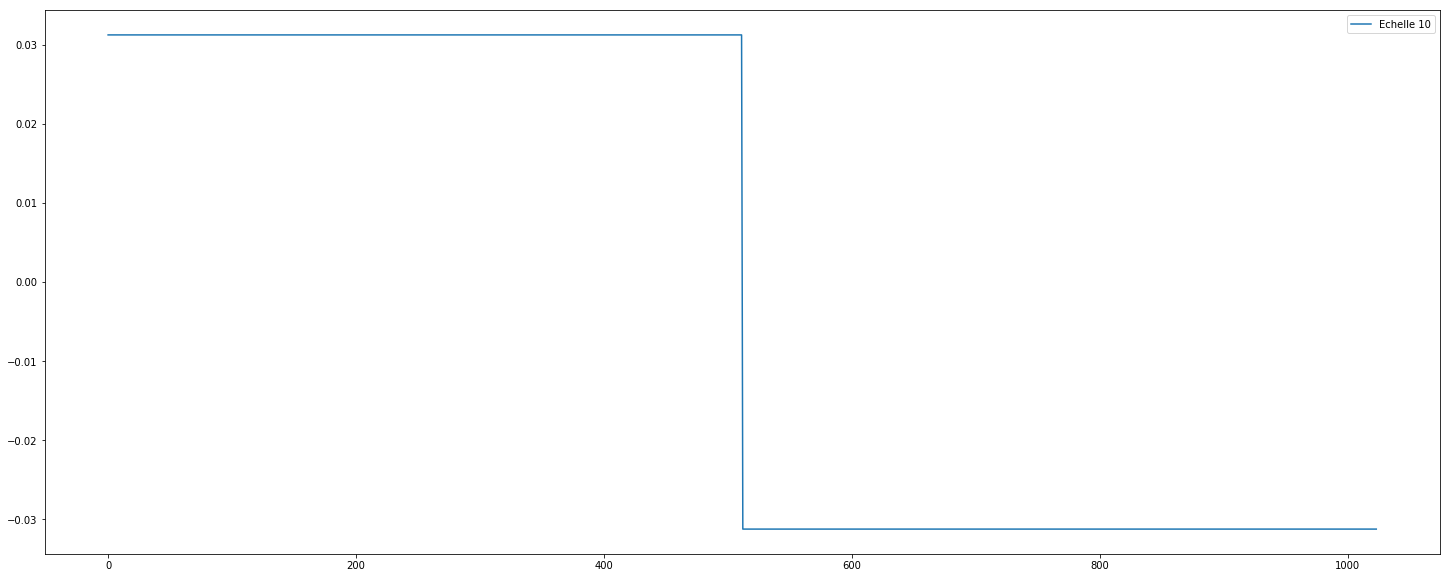

In [82]:
N = 1024
qmf = 'haar'
pos = 1.0
plt.figure(figsize=(25, 10))
for scale in range(10, 11) :
    Phi = VisuFoncEchel(N, qmf, scale, pos, mode='per')
    plt.plot(Phi, label="Echelle " + str(scale))
    plt.legend()
plt.show()

Pour le moment on ne sait pas faire autrement que avec le mode périodique car par exemple si on prend le mode 0, il va rajouter des 0 à la fin, mais également au début des coefficients. Il va donc rajouter un coefficient à chaque fois.

4


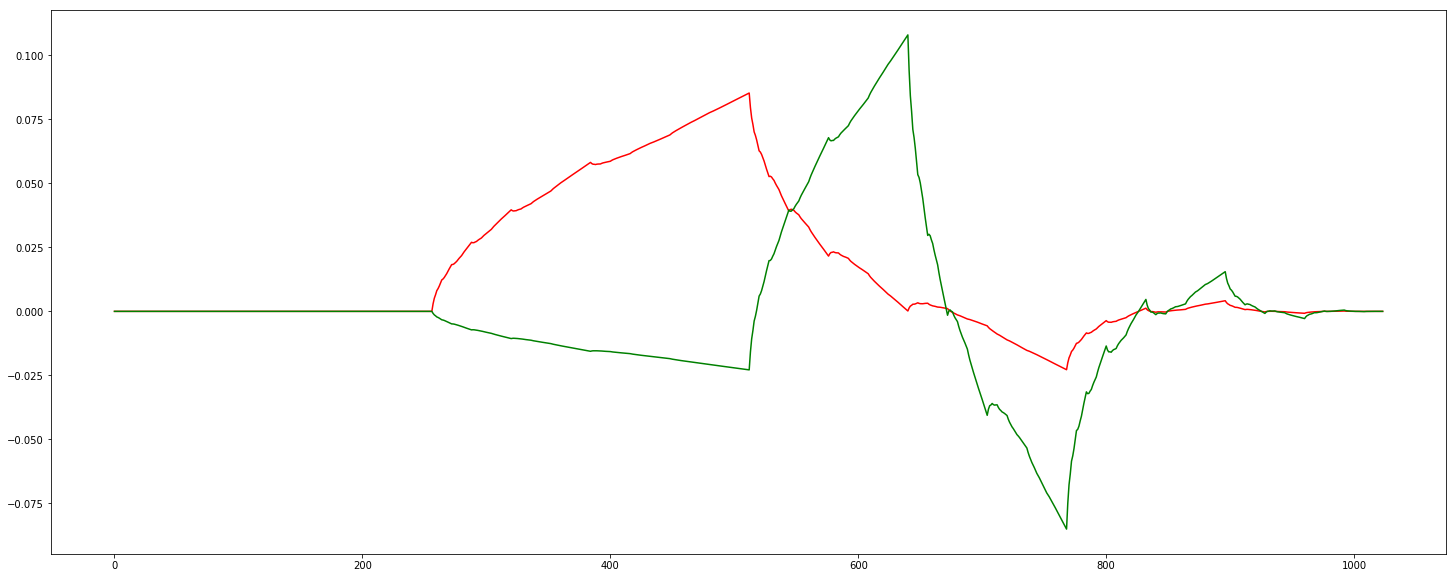

In [105]:
N = 1024
qmf = 'db2'
scale = 8
pos = 0.5
Psi = VisuOnd(N,qmf,scale,pos)
Phi = VisuFoncEchel(N, qmf, scale, pos)
plt.figure(figsize=(25,10))
plt.plot(Phi,'r')
plt.plot(Psi, 'g')
plt.show()

Les ondelettes sont codées dans le sens inverse que celles du cours.

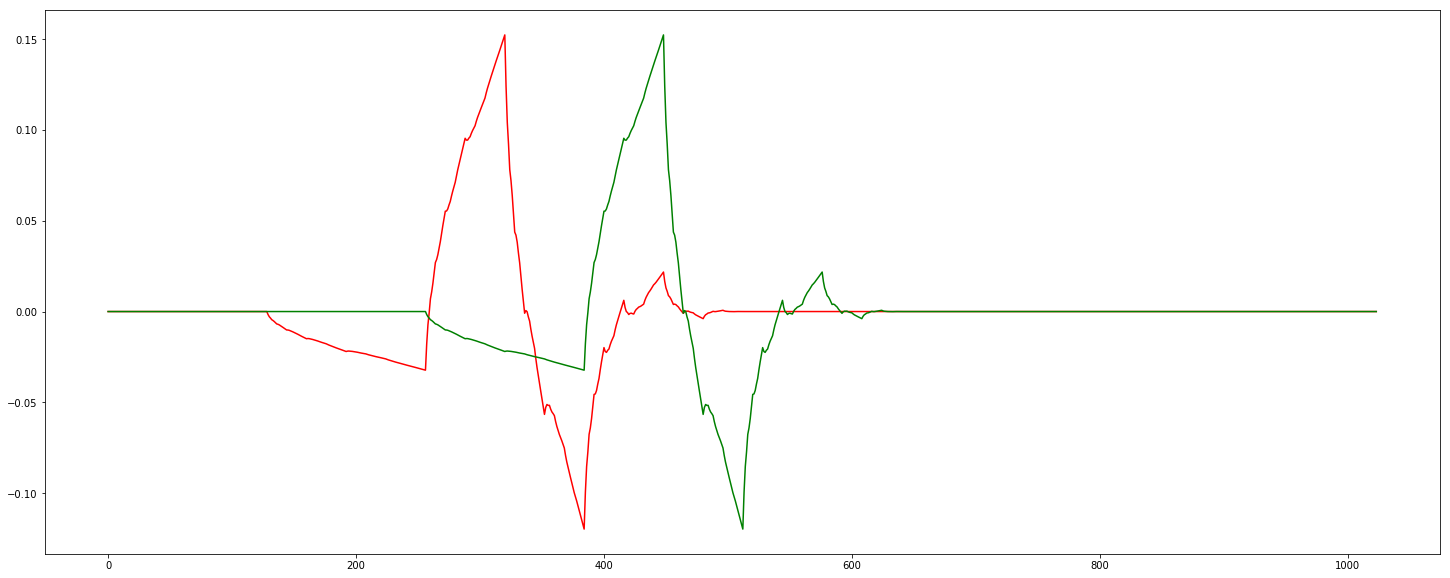

In [118]:
# affichage de 2 ondelettes consécutives
N = 1024
qmf = 'db2'
scale = 7
pos = 0.3
Psi1 = VisuOnd(N, qmf, scale, pos)
Psi2 = VisuOnd(N, qmf, scale, pos+1*(2**scale/N))
plt.figure(figsize=(25,10))
plt.plot(Psi1, 'r')
plt.plot(Psi2, 'g')
plt.show()

In [52]:
@interact(N=widgets.IntSlider(min=0,max=150,step=1,value=50,continuous_update=False))
def AfficheApproxnonLin(N):
    Srec=ApproxOnd1Dv2(S3,'haar',9,N)
    plt.figure(figsize=(25,10))
    plt.plot(Srec,'r')
    plt.plot(S3)
    plt.show()


interactive(children=(IntSlider(value=50, continuous_update=False, description='N', max=150), Output()), _dom_…